## 2차 과제

- 주제: 데이터 크롤링을 활용한 뉴스 & 리뷰 데이터 분석
- 데이터: 자유롭게 크롤링
- 사용 라이브러리: selenium, beautifulsoup, etc.

### 1. 뉴스 기사 데이터 크롤링

1.1 원하는 뉴스 기사의 본문을 크롤링하시오.

In [22]:
import requests
from bs4 import BeautifulSoup

def get_naver_article(url):
    # URL에서 HTML 데이터 가져오기
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 기사 본문 추출
    article_body = soup.find('div', {'id': 'newsct_article'})

    # 본문 텍스트만 추출하여 반환
    if article_body:
        article_text = article_body.get_text().strip()
        return article_text
    else:
        return None

# 네이버 기사 URL
url = 'https://n.news.naver.com/mnews/article/018/0005692683?sid=105'

# 기사 내용 가져오기
article_text = get_naver_article(url)
if article_text:
    print(article_text)
else:
    print('기사를 가져오는 데 실패했습니다.')

2월 美 PPI 상승률, 전월 대비 0.6%↑6월 금리 인하 확률 줄어들어뉴욕 증시 또한 일제히 내림세[이데일리 김가은 기자] 연일 최고가 기록을 새로 쓰던 가상자산 대장주 비트코인이 시장 예상치를 웃돈 미국 물가지표에 하락했다. 같은 영향으로 뉴욕 증시 또한 일제히 내림세를 보였다.



(사진=픽사베이)15일 가상자산 시황중계 사이트 코인마켓캡에 따르면 오전 8시 기준 비트코인 가격은 24시간 전 대비 2.04% 하락한 7만1500달러를 기록했다. 같은 시간 알트코인(비트코인 외 가상자산) 대표격인 이더리움은 전일 대비 2.73% 하락한 3876달러에, 리플은 2.94% 내린 0.66달러에 거래됐다. 같은 시간 업비트 기준 가격은 비트코인이 1억294만원, 이더리움이 557만7000원에 거래됐다. 리플은 962.2원이다.시장에서는 미국의 2월 주요 물가지표가 줄줄이 시장 예상치를 웃돈 점이 영향을 미쳤다고 보고 있다. 14일(현지시간) 미국 노동부는 2월 미국 생산자물가지수(PPI)가 전월 대비 0.6% 상승했다고 밝혔다. 이는 전월 대비 0.3% 상승을 점쳤던 시장 전망치를 크게 웃도는 수준이다. 전년 동기 대비로는 1.6% 올랐다. 지난해 8월 이후 6개월 만에 가장 높은 상승률이다. 시장에서는 오는 6월 미국 연방준비제도(Fed)가 금리 인하에 나설 가능성이 점차 줄어들고 있다고 전망했다. 시카고상품거래소(CME) 페드워치에 따르면 연방기금(FF) 금리 선물시장에서 마감시점 연방준비위원회가 6월 금리인하에 나설 가능성은 62.8%다. 이번 주 초 70%대에서 하락했다. 미 가상자산 전문매체 코인데스크는 “올해 통화 정책이 훨씬 완화될 것이라는 기대감이 계속 낮아지고 있다”며 “6월 연준의 금리 인하 가능성은 50%까지 떨어졌다”고 분석했다.2월 소비자물가지수(CPI)에 이어 PPI도 예상 범주를 상회하자 뉴욕 증시 또한 일제히 하락했다. 14일(현지시간) 뉴욕증권거래소(NYSE)에서 다우존스30산업평균지수는 전 거래일 대비 0.35%, 스탠더드앤드푸어

1.2 크롤링한 본문을 단어 단위로 나누고 각 단어가 나온 횟수와 함께 dataframe 형식으로 변환하시오.

In [24]:
import pandas as pd

# 단어 빈도수 계산
def word_counts(article_text):
    word_counts = {}
    if type(article_text) == str:
        for word in article_text.split():
            word_counts[word] = word_counts.get(word, 0) + 1
    elif type(article_text) == list:
        for word in article_text:
            word_counts[word] = word_counts.get(word, 0) + 1
    return word_counts

article_counts=word_counts(article_text)

# DataFrame으로 변환
df_article_counts = pd.DataFrame.from_dict(article_counts, orient='index', columns=['count'])

# 단어 빈도수 기준으로 정렬
df_article_counts = df_article_counts.sort_values(by=['count'], ascending=False)

# 출력
print(df_article_counts)


       count
대비         6
미국         5
하락했다.      4
시장         4
금리         4
...      ...
점쳤던        1
전망치를       1
크게         1
웃도는        1
설명했다.      1

[206 rows x 1 columns]


1.3 불용어를 제거하시오.

In [25]:
# prompt: 불용어를 제거하시오.
! pip install konlpy


In [43]:
from konlpy.tag import Okt
okt = Okt()
word_tokens = okt.morphs(article_text)
# 불용어 목록
stop_words = """가
가까스로
가령
각
각각
각자
각종
갖고말하자면
같다
같이
개의치않고
거니와
거바
거의
것
것과 같이
것들
게다가
게우다
겨우
견지에서
결과에 이르다
결국
결론을 낼 수 있다
겸사겸사
고려하면
고로
곧
공동으로
과
과연
관계가 있다
관계없이
관련이 있다
관하여
관한
관해서는
구
구체적으로
구토하다
그
그들
그때
그래
그래도
그래서
그러나
그러니
그러니까
그러면
그러므로
그러한즉
그런 까닭에
그런데
그런즉
그럼
그럼에도 불구하고
그렇게 함으로써
그렇지
그렇지 않다면
그렇지 않으면
그렇지만
그렇지않으면
그리고
그리하여
그만이다
그에 따르는
그위에
그저
그중에서
그치지 않다
근거로
근거하여
기대여
기점으로
기준으로
기타
까닭으로
까악
까지
까지 미치다
까지도
꽈당
끙끙
끼익
나
나머지는
남들
남짓
너
너희
너희들
네
넷
년
논하지 않다
놀라다
누가 알겠는가
누구
다른
다른 방면으로
다만
다섯
다소
다수
다시 말하자면
다시말하면
다음
다음에
다음으로
단지
답다
당신
당장
대로 하다
대하면
대하여
대해 말하자면
대해서
댕그
더구나
더군다나
더라도
더불어
더욱더
더욱이는
도달하다
도착하다
동시에
동안
된바에야
된이상
두번째로
둘
둥둥
뒤따라
뒤이어
든간에
들
등
등등
딩동
따라
따라서
따위
따지지 않다
딱
때
때가 되어
때문에
또
또한
뚝뚝
라 해도
령
로
로 인하여
로부터
로써
륙
를
마음대로
마저
마저도
마치
막론하고
만 못하다
만약
만약에
만은 아니다
만이 아니다
만일
만큼
말하자면
말할것도 없고
매
매번
메쓰겁다
몇
모
모두
무렵
무릎쓰고
무슨
무엇
무엇때문에
물론
및
바꾸어말하면
바꾸어말하자면
바꾸어서 말하면
바꾸어서 한다면
바꿔 말하면
바로
바와같이
밖에 안된다
반대로
반대로 말하자면
반드시
버금
보는데서
보다더
보드득
본대로
봐
봐라
부류의 사람들
부터
불구하고
불문하고
붕붕
비걱거리다
비교적
비길수 없다
비로소
비록
비슷하다
비추어 보아
비하면
뿐만 아니라
뿐만아니라
뿐이다
삐걱
삐걱거리다
사
삼
상대적으로 말하자면
생각한대로
설령
설마
설사
셋
소생
소인
솨
쉿
습니까
습니다
시각
시간
시작하여
시초에
시키다
실로
심지어
아
아니
아니나다를가
아니라면
아니면
아니었다면
아래윗
아무거나
아무도
아야
아울러
아이
아이고
아이구
아이야
아이쿠
아하
아홉
안 그러면
않기 위하여
않기 위해서
알 수 있다
알았어
앗
앞에서
앞의것
야
약간
양자
어
어기여차
어느
어느 년도
어느것
어느곳
어느때
어느쪽
어느해
어디
어때
어떠한
어떤
어떤것
어떤것들
어떻게
어떻해
어이
어째서
어쨋든
어쩔수 없다
어찌
어찌됏든
어찌됏어
어찌하든지
어찌하여
언제
언젠가
얼마
얼마 안 되는 것
얼마간
얼마나
얼마든지
얼마만큼
얼마큼
엉엉
에
에 가서
에 달려 있다
에 대해
에 있다
에 한하다
에게
에서
여
여기
여덟
여러분
여보시오
여부
여섯
여전히
여차
연관되다
연이서
영
영차
옆사람
예
예를 들면
예를 들자면
예컨대
예하면
오
오로지
오르다
오자마자
오직
오호
오히려
와
와 같은 사람들
와르르
와아
왜
왜냐하면
외에도
요만큼
요만한 것
요만한걸
요컨대
우르르
우리
우리들
우선
우에 종합한것과같이
운운
월
위에서 서술한바와같이
위하여
위해서
윙윙
육
으로
으로 인하여
으로서
으로써
을
응
응당
의
의거하여
의지하여
의해
의해되다
의해서
이
이 되다
이 때문에
이 밖에
이 외에
이 정도의
이것
이곳
이때
이라면
이래
이러이러하다
이러한
이런
이럴정도로
이렇게 많은 것
이렇게되면
이렇게말하자면
이렇구나
이로 인하여
이르기까지
이리하여
이만큼
이번
이봐
이상
이어서
이었다
이와 같다
이와 같은
이와 반대로
이와같다면
이외에도
이용하여
이유만으로
이젠
이지만
이쪽
이천구
이천육
이천칠
이천팔
인 듯하다
인젠
일
일것이다
일곱
일단
일때
일반적으로
일지라도
임에 틀림없다
입각하여
입장에서
잇따라
있다
자
자기
자기집
자마자
자신
잠깐
잠시
저
저것
저것만큼
저기
저쪽
저희
전부
전자
전후
점에서 보아
정도에 이르다
제
제각기
제외하고
조금
조차
조차도
졸졸
좀
좋아
좍좍
주룩주룩
주저하지 않고
줄은 몰랏다
줄은모른다
중에서
중의하나
즈음하여
즉
즉시
지든지
지만
지말고
진짜로
쪽으로
차라리
참
참나
첫번째로
쳇
총적으로
총적으로 말하면
총적으로 보면
칠
콸콸
쾅쾅
쿵
타다
타인
탕탕
토하다
통하여
툭
퉤
틈타
팍
팔
퍽
펄렁
하
하게될것이다
하게하다
하겠는가
하고 있다
하고있었다
하곤하였다
하구나
하기 때문에
하기 위하여
하기는한데
하기만 하면
하기보다는
하기에
하나
하느니
하는 김에
하는 편이 낫다
하는것도
하는것만 못하다
하는것이 낫다
하는바
하더라도
하도다
하도록시키다
하도록하다
하든지
하려고하다
하마터면
하면 할수록
하면된다
하면서
하물며
하여금
하여야
하자마자
하지 않는다면
하지 않도록
하지마
하지마라
하지만
하하
한 까닭에
한 이유는
한 후
한다면
한다면 몰라도
한데
한마디
한적이있다
한켠으로는
한항목
할 따름이다
할 생각이다
할 줄 안다
할 지경이다
할 힘이 있다
할때
할만하다
할망정
할뿐
할수있다
할수있어
할줄알다
할지라도
할지언정
함께
해도된다
해도좋다
해봐요
해서는 안된다
해야한다
해요
했어요
향하다
향하여
향해서
허
허걱
허허
헉
헉헉
헐떡헐떡
형식으로 쓰여
혹시
혹은
혼자
훨씬
휘익
휴
흐흐
흥
힘입어
[
이데일리
김가은
기자
]
(
\n\n\n\n
.
=
↑
은
했다
대비
,
는
)
전
”
“
“
이다
같은
더
총
시
한
일제
히
""".split('\n')
#stop_words = set(stop_sords.split('/n'))
print(stop_words)
# 불용어 제거
#word_tokens= word_tokens[~word_tokens.index.isin(stop_words)]
result = [word for word in word_tokens if not word in stop_words]
# 출력
print(result)

['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '다만', '다섯', '다소', '다수', '다시 말하자면', '다시말하면', '다음', '다음에', '다음으로', '단지', '답다', '당신', '당장', '대로 하다', '대하면', '대하여', '대해 말하자면', '대해서', '댕그', '더구나', '더군다나', '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하다', '동시에', '동안', '된바에야', '된이상', '두번째로', '둘', '둥둥', '뒤따라', '뒤이어'

In [45]:
selected_counts=word_counts(result)
print(selected_counts)

# DataFrame으로 변환
df_selected_counts = pd.DataFrame.from_dict(selected_counts, orient='index', columns=['count'])

# 단어 빈도수 기준으로 정렬
df_selected_counts = df_selected_counts.sort_values(by=['count'], ascending=False)

# 출력
print(df_selected_counts.head(20))
df_selected_counts

{'2월': 4, '美': 1, 'PPI': 3, '상': 2, '승률': 2, '전월': 3, '0.6%': 2, '6월': 4, '금리': 4, '인하': 3, '확률': 1, '줄어들어': 1, '뉴욕': 4, '증시': 3, '내림세': 1, '연일': 1, '최고': 1, '기록': 2, '새로': 1, '쓰던': 1, '가상': 4, '자산': 5, '대': 1, '장주': 1, '비트코인': 6, '시장': 7, '상치': 2, '웃돈': 2, '미국': 6, '물가': 4, '지표': 2, '하락': 6, '영향': 2, '내림세를': 1, '보였다': 1, '\n\n\n\n': 1, '사진': 1, '픽사': 1, '베이': 1, '15일': 1, '황': 1, '중계': 1, '사이트': 1, '코인': 3, '마켓': 1, '캡': 1, '따르면': 2, '오전': 1, '8시': 1, '기준': 2, '가격': 2, '24시간': 1, '2.04%': 1, '7만': 1, '1500달러': 1, '알트': 1, '외': 1, '대표': 1, '격인': 1, '리움': 3, '전일': 1, '2.73%': 1, '3876달러': 1, '리플': 2, '2.94%': 1, '내린': 1, '0.66달러': 1, '거래': 3, '됐다': 2, '업': 1, '비트': 1, '1억': 1, '294만원': 1, '557만': 1, '7000원': 1, '962.2원': 1, '에서는': 2, '주요': 2, '줄줄이': 1, '점': 2, '미쳤다고': 1, '보고': 1, '14일': 2, '현지': 2, '노동부': 1, '생산자': 1, '지수': 4, '상승': 2, '했다고': 1, '밝혔다': 1, '이는': 1, '0.3%': 2, '쳤던': 1, '망치': 1, '크게': 1, '웃도는': 1, '수준': 1, '동기': 1, '로는': 1, '1.6%': 1, '올랐다': 1, '지난해': 1, '8월': 1, '이후': 1, 

,count
시장,7
비트코인,6
미국,6
하락,6
자산,5
...,...
올랐다,1
지난해,1
8월,1
이후,1


1.4 처리한 데이터를 워드아트로 변환해 어떤 단어가 가장 많이 나왔는지 확인하시오(폰트, 색 등 자유).

In [72]:
!pip install wordcloud
from wordcloud import WordCloud

In [74]:
!apt-get update -qq   # 폰트 설정을 위한 코드
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


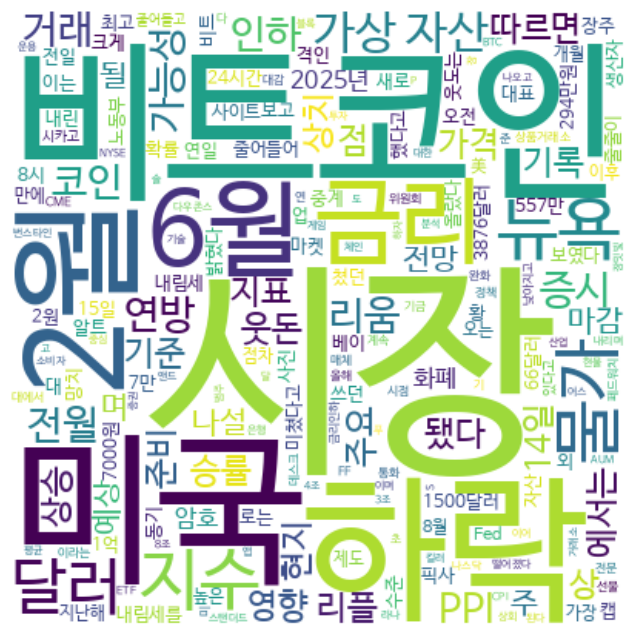

In [82]:
import matplotlib.pyplot as plt

wc = WordCloud(random_state = 123, font_path = 'NanumBarunGothic', width = 400, height = 400, background_color = 'white')
wc.generate(" ".join(result))

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

비트코인의 하락에 대한 기사였는데 워드아트를 통해서도 미국 시장과 금리에 대한 좋지 않은 상황과 비트코인의 상황이 연관이 있음을 알 수 있고, 2월과 6월을 주목해야할 것 같다.

### 2. 플레이스토어 리뷰 데이터 크롤링(동적 크롤링)

2.1 100개 이상의 리뷰를 가진 앱에 있는 댓글 리뷰를 크롤링하시오.

In [91]:
!pip install selenium
from selenium import webdriver

import sys

!sudo add-apt-repository ppa:saiarcot895/chromium-beta
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser

!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin/

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

In [114]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('disable-dev-shm-usage')

webdriver_service = Service('/usr/bin/chromedriver')
driver = webdriver.Chrome(service=webdriver_service, options = options)

url = 'https://play.google.com/store/apps/details?id=com.QSSUMSTUDIO.QSWaterMelon&hl=ko&gl=US' #크롤링주소
# 페이지 열기
driver.get(url)
# 페이지 로딩 대기
wait = WebDriverWait(driver, 5)

#스크롤내리기
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#리뷰전체보기
spread_reviews = driver.find_element(By.XPATH,'//*[@id="yDmH0d"]/c-wiz[2]/div/div/div[1]/div/div[2]/div/div[1]/div[1]/c-wiz[5]/section/div/div[2]/div[5]/div/div/button/div[3]')

if spread_reviews.is_displayed():
    driver.execute_script("arguments[0].click();", spread_reviews)
    time.sleep(1.5)


In [115]:
#팝업창 스크롤 내리기
all_reviews = driver.find_element(by=By.XPATH, value ='//*[@id="yDmH0d"]/div[4]/div[2]/div/div/div/div/div[2]')
for i in range(100):
    driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', all_reviews)
    time.sleep(3)


2.2 크롤링한 데이터를 dataframe 형태로 변환하시오(날짜, 별점, 리뷰 유저 등).

In [116]:

data = pd.DataFrame(data=[], columns=['날짜','리뷰','별점'])

#날짜, 리뷰, 별점 수집
dates = driver.find_elements(by=By.XPATH, value = '//span[@class="bp9Aid"]')
reviews=driver.find_elements(by=By.XPATH, value = '//div[@class="h3YV2d"]')
stargrades = driver.find_elements(by=By.XPATH, value = '//div[@class="iXRFPc"]')


# k개의 리뷰를 수집합니다.
for i in range(len(reviews)):
    tmp = []
    tmp.append(dates[i].text)
    tmp.append(reviews[i].text)
    tmp.append(stargrades[i].get_attribute('aria-label'))

    tmp = pd.DataFrame(data=[tmp], columns = data.columns)
    data = pd.concat([data,tmp])

print("수박게임 앱 리뷰 수집 완료")


data.reset_index(inplace=True, drop=True)
data

수박게임 앱 리뷰 수집 완료


,날짜,리뷰,별점
0,,,별표 5개 만점에 5개를 받았습니다.
1,,,별표 5개 만점에 5개를 받았습니다.
2,,,별표 5개 만점에 5개를 받았습니다.
3,2024년 2월 21일,지금까지 양파.수박 게임중 제일 좋았습니다. 와이프도 수시로 하고 특히 유아 애들이...,별표 5개 만점에 5개를 받았습니다.
4,2024년 2월 14일,너무재미있어서 계속 하고있어요. 일단 단점은 1.한번 시작 면 계속하게되서 시간이 ...,별표 5개 만점에 5개를 받았습니다.
...,...,...,...
323,2023년 12월 17일,응꼬겜,별표 5개 만점에 1개를 받았습니다.
324,2023년 11월 24일,재밋어요,별표 5개 만점에 5개를 받았습니다.
325,2023년 12월 13일,잼나요,별표 5개 만점에 5개를 받았습니다.
326,2023년 11월 27일,앙기모,별표 5개 만점에 5개를 받았습니다.


2.3 긍정 리뷰와 부정 리뷰를 나누시오(기준은 자유).

In [117]:
import re

tmp = data.copy()

tmp['별점'] = tmp['별점'].apply(lambda x : x[5:])

m = re.compile('[0-9][\.0-9]*') #정규표현식

tmp['별점'] = tmp['별점'].apply(lambda x : m.findall(x)[0])
tmp['별점']

0      5
1      5
2      5
3      5
4      5
      ..
323    1
324    5
325    5
326    5
327    5
Name: 별점, Length: 328, dtype: object

In [118]:
#별점 type변환
tmp.별점 = tmp.별점.astype(float)
#별점 나누기, 2이하는 부정, 4이상은 긍정
tmp_low=tmp[tmp['별점']<=2]
tmp_high=tmp[tmp['별점']>=4]

tmp_low

,날짜,리뷰,별점
6,2024년 2월 22일,게임 끝날 때마나 광고가 나오는데 3번 중에 한 번은 나가기 버튼이 없는 광고가 나...,1.0
37,2023년 11월 17일,잘 플레이하던 중에 렉걸려서 아예 멈춰버리는 경우가 10번 이상 있습니다. 그럴땐 ...,1.0
44,2023년 12월 15일,종료 버튼이 없어 아래 히든메뉴 올려서 뒤로가기 버튼눌러 종료 누르려 하니 히든메뉴...,1.0
45,2023년 10월 28일,게임하다가 한번씩 멈추는 현상이 발생합니다 (강제종료해야함) 갤럭시 노트10 & 노...,1.0
46,2023년 11월 5일,단 한번도 5분이상 해본적 없음 게임이 멈춤 물리엔진도 괴상함 겉은 아주 잘 배끼긴...,1.0
61,2024년 2월 25일,과일 맞추면 주변과일들이 튕겨나가서 정리한게 어질러지네요,1.0
73,2023년 11월 2일,도중에 깨고있는데 계속 멈춰서 짜증나요. 지울게요,1.0
76,2023년 11월 10일,너무 많이 멈춤 게임을 10분이상을 못함 잘 따라했는데 그거때문에 기분 상함,1.0
82,2023년 11월 27일,개별로임 그냥 제대로 된게 아무것도 없음 똑같은 상황에서 어떤상황에는 끼고 어떤상황...,1.0
89,2023년 12월 13일,그래픽이 마음에 들어서 참고 했는데 게임이 중간중간 멈추는게 개선되는 기미가 안보여...,2.0


### 3. 자유 분석

3.1 위에서 크롤링한 데이터들을 활용해 자유롭게 인사이트를 도출하시오.

In [120]:
list_high_review = tmp_high['리뷰'].tolist()
print(list_high_review)

['', '', '', '지금까지 양파.수박 게임중 제일 좋았습니다. 와이프도 수시로 하고 특히 유아 애들이 좋아합니다. 하단 광고는 괜찮은데 재 도전시 광고가 나오면 짜증을 내어서 추가 문의드립니다. 3300원 한번 결제하면 평생 광고 없이 할 수 있나요 아니면 기간이 있나요 그리고 게임중 광고 및 재 도전시 광고도 사라지나요? 앞으로 더욱 발전하시고 온 가족이 할수있는 더 좋은 게임 개발 부탁드립니다. 화이팅 입니다! 추가로 과일 이름 알수 있는 기능이 있으면 좋겠습니다. 애들이 물어보는데 그림으로는 잘 이해가 않되요 ㅎㅎ', '너무재미있어서 계속 하고있어요. 일단 단점은 1.한번 시작 면 계속하게되서 시간이 많이간다.장점은 1.걍 재밌다 2.은근히 몽키랜드가 중독된다. 3. 시간 이 늦게 갈때하면 딱이다. 끝(:', '엄청 재미있어요. 다른 수박게임은 광고가 많이 나와서 지웠는데 이 게임은 중간에 끊이는 광고도 안 나와서 좋아요. 불편한 점은 없는것 같아요. 추천드립니다!!', '정말재밌습니다! 중독성이... 한가지 건의사항이있다면 내려가는 속도를 조절할수있게 해주심 좋겠어요. 더 빠르게요ㅎㅎ 수고하세요.', '느닷없이 펑펑 터지는 모습이 나를 빵~ 터지게 만들어줘요. 정말 잼있습니다. 그리고 오늘부터 배경음악이 바뀌었나봐요. 그것도 좋네요.^^', '광고가 자주나와서 광고제거를 누르니 3300원이 출금 되었는데 금액이나 동의알림없이 이렇게 출금되는게 놀랍네요 뭔가 절차후에 출금되어야하는거 아닌가요? 큰 금액이었으면 어쩔뻔 한달에 한번씩 빠져나가는건지 취소는 어떻게해야하는지 알려주시면 좋겠습니다 게임은 재미있지만 클릭한번에 뚝딱 빠져나가는건 정말 위험한듯', '이게 제일 디자인도 낫고 이뻐요😆 그리고 광고도 중간에 갑자기 나오지도 않고 게임 한 판 다 끝나고 나와서 너무너무 좋아요ㅠㅠ 좋은 앱 만들어주셔서 감사해요🤍', '혹시 수박 2개도 되는 건가요?ㅎㅎ 하나는 열심히 하면 되는데 두개 만들려고 아무리 노력해도ㅜㅜ 힘들어요~~ 아 그리고 게임 재밌어요~

In [122]:
#토큰화 후 형태소로 분할
from konlpy.tag import Okt
okt = Okt()
word_tokens=[]
for word in list_high_review:
    word_tokens += okt.morphs(word)
print(word_tokens)

high_review_words = [word for word in word_tokens if not word in stop_words]
high_review_words

['지금', '까지', '양파', '.', '수박', '게임', '중', '제일', '좋았습니다', '.', '와이프', '도', '수시로', '하고', '특히', '유아', '애', '들', '이', '좋아합니다', '.', '하단', '광고', '는', '괜찮은데', '재', '도', '전시', '광고', '가', '나오면', '짜증', '을', '내', '어서', '추가', '문의', '드립니다', '.', '3300원', '한번', '결제', '하면', '평생', '광고', '없이', '할', '수', '있나요', '아니면', '기간', '이', '있나요', '그리고', '게임', '중', '광고', '및', '재', '도', '전시', '광고', '도', '사라지나요', '?', '앞', '으로', '더욱', '발전', '하시고', '온', '가족', '이', '할수있는', '더', '좋은', '게임', '개발', '부탁드립니다', '.', '화이팅', '입니다', '!', '추가', '로', '과일', '이름', '알수', '있는', '기능', '이', '있으면', '좋겠습니다', '.', '애', '들', '이', '물어보는데', '그림', '으로는', '잘', '이해', '가', '않되', '요', 'ㅎㅎ', '너무', '재미있어서', '계속', '하고있어요', '.', '일단', '단점', '은', '1', '.', '한번', '시작', '면', '계속', '하게되', '서', '시간', '이', '많이', '간다', '.', '장점', '은', '1', '.', '걍', '재밌다', '2', '.', '은근', '히', '몽키', '랜드', '가', '중독', '된다', '.', '3', '.', '시간', '이', '늦게', '갈', '때', '하', '면', '딱이다', '.', '끝', '(:', '엄청', '재미있어요', '.', '다른', '수박', '게임', '은', '광고', '가', '많이', '나와서', '지웠는데', '이',

['지금',
 '양파',
 '수박',
 '게임',
 '중',
 '제일',
 '좋았습니다',
 '와이프',
 '도',
 '수시로',
 '하고',
 '특히',
 '유아',
 '애',
 '좋아합니다',
 '하단',
 '광고',
 '괜찮은데',
 '재',
 '도',
 '전시',
 '광고',
 '나오면',
 '짜증',
 '내',
 '어서',
 '추가',
 '문의',
 '드립니다',
 '3300원',
 '한번',
 '결제',
 '하면',
 '평생',
 '광고',
 '없이',
 '할',
 '수',
 '있나요',
 '기간',
 '있나요',
 '게임',
 '중',
 '광고',
 '재',
 '도',
 '전시',
 '광고',
 '도',
 '사라지나요',
 '?',
 '앞',
 '더욱',
 '발전',
 '하시고',
 '온',
 '가족',
 '할수있는',
 '좋은',
 '게임',
 '개발',
 '부탁드립니다',
 '화이팅',
 '입니다',
 '!',
 '추가',
 '과일',
 '이름',
 '알수',
 '있는',
 '기능',
 '있으면',
 '좋겠습니다',
 '애',
 '물어보는데',
 '그림',
 '으로는',
 '잘',
 '이해',
 '않되',
 '요',
 'ㅎㅎ',
 '너무',
 '재미있어서',
 '계속',
 '하고있어요',
 '단점',
 '1',
 '한번',
 '시작',
 '면',
 '계속',
 '하게되',
 '서',
 '많이',
 '간다',
 '장점',
 '1',
 '걍',
 '재밌다',
 '2',
 '은근',
 '몽키',
 '랜드',
 '중독',
 '된다',
 '3',
 '늦게',
 '갈',
 '면',
 '딱이다',
 '끝',
 '(:',
 '엄청',
 '재미있어요',
 '수박',
 '게임',
 '광고',
 '많이',
 '나와서',
 '지웠는데',
 '게임',
 '중간',
 '끊이는',
 '광고',
 '도',
 '안',
 '나와서',
 '좋아요',
 '불편한',
 '점',
 '없는것',
 '같아요',
 '추천',
 '드립니다',
 '!!',
 '정말',
 '재밌습니다',
 '

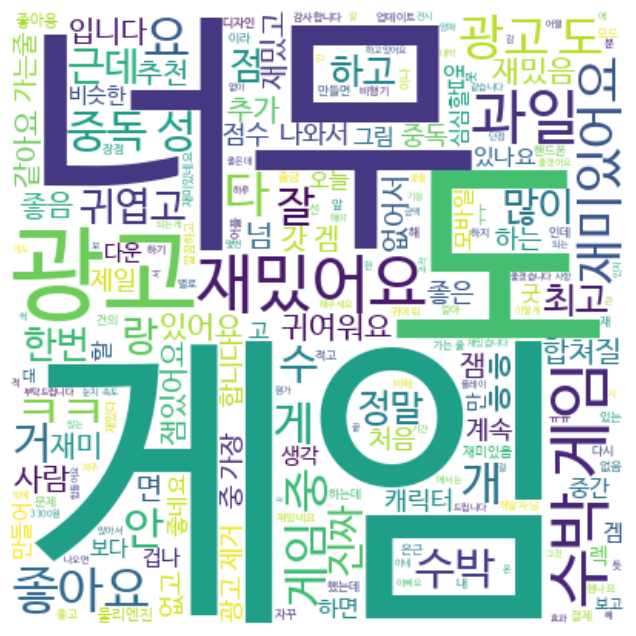

In [123]:
#워드아트로
import matplotlib.pyplot as plt

wc = WordCloud(random_state = 123, font_path = 'NanumBarunGothic', width = 400, height = 400, background_color = 'white')
wc.generate(" ".join(high_review_words))

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

게임이 너무 재미있고 귀엽고 좋다는 긍정적인 반응이 많지만 광고에 대한 언급이 많은 것으로 보아 광고로인한 불편함이 있는 듯 하다.

In [124]:
list_low_review = tmp_low['리뷰'].tolist()
print(list_low_review)

['게임 끝날 때마나 광고가 나오는데 3번 중에 한 번은 나가기 버튼이 없는 광고가 나와서 광고를 멈추려면 게임을 껐다가 다시 켜야함 잔머리 좀 그만 굴리자 계발자야', '잘 플레이하던 중에 렉걸려서 아예 멈춰버리는 경우가 10번 이상 있습니다. 그럴땐 기다려도 풀리지 않아서 완전히 나갔다가 새로 시작하는 방법뿐이네요ㅠ', '종료 버튼이 없어 아래 히든메뉴 올려서 뒤로가기 버튼눌러 종료 누르려 하니 히든메뉴가 순간적으로 사라짐 히든메뉴 다시 불러올려도 바로 사라져서 하단 배너광고 클릭해버림. 몇번을 배너광고 눌렸는지...짜증나서 삭제함. 정식게임보다 별로고 애플스토어 게임보다 별로임', '게임하다가 한번씩 멈추는 현상이 발생합니다 (강제종료해야함) 갤럭시 노트10 & 노트10+ 같은현상 목격', '단 한번도 5분이상 해본적 없음 게임이 멈춤 물리엔진도 괴상함 겉은 아주 잘 배끼긴 햇는데 속은 썩엇다', '과일 맞추면 주변과일들이 튕겨나가서 정리한게 어질러지네요', '도중에 깨고있는데 계속 멈춰서 짜증나요. 지울게요', '너무 많이 멈춤 게임을 10분이상을 못함 잘 따라했는데 그거때문에 기분 상함', '개별로임 그냥 제대로 된게 아무것도 없음 똑같은 상황에서 어떤상황에는 끼고 어떤상황에는 합쳐지고 지멋대로 튕겨서 이상하게 합쳐짐 역겨움', '그래픽이 마음에 들어서 참고 했는데 게임이 중간중간 멈추는게 개선되는 기미가 안보여서 그만하려고합니다.', '아쉬운면이있다', '중력이 이상함. 호두?가 구석에 있고 옆에 과일들 있어서 꽉 낀 상태인데 호두쪽 구석에 제일 작은 블루베리 넣으면 호두가 위로 튀어 올라감. 마치 호두가 블루베리보다 무게가 가벼운것 처럼.', '게임이 자꾸 멈춰서 할수가 없네요 좀 고처주세요 핸드폰은 s10 5g 입니다', '한게임후 무조건 광고가 떠 귀찮음', '어떻게 밤이랑 복숭아가 이렇게 크죠? 혹시 현실에서 못 보셨나요? 그럴 수 있죠 이해해요 그리고 자꾸 튕겨요 이거 버그에요 빨리 수정해주세요 감사합니다.', '너무 힘들고 재미없어요', 

In [125]:
#토큰화 후 형태소로 분할
from konlpy.tag import Okt
okt = Okt()
word_tokens=[]
for word in list_low_review:
    word_tokens += okt.morphs(word)
print(word_tokens)

low_review_words = [word for word in word_tokens if not word in stop_words]
low_review_words

['게임', '끝날', '때', '마나', '광고', '가', '나오는데', '3', '번', '중', '에', '한', '번은', '나가기', '버튼', '이', '없는', '광고', '가', '나와서', '광고', '를', '멈추려면', '게임', '을', '껐다가', '다시', '켜야', '함', '잔', '머리', '좀', '그만', '굴', '리자', '계발', '자', '야', '잘', '플레이', '하던', '중', '에', '렉', '걸려서', '아예', '멈춰', '버리는', '경우', '가', '10', '번', '이상', '있습니다', '.', '그럴', '땐', '기다려도', '풀리지', '않아서', '완전히', '나갔다가', '새로', '시작', '하는', '방법', '뿐이네요', 'ㅠ', '종료', '버튼', '이', '없어', '아래', '히든', '메뉴', '올려서', '뒤', '로', '가기', '버튼', '눌러', '종료', '누르려', '하니', '히든', '메뉴', '가', '순간', '적', '으로', '사라짐', '히든', '메뉴', '다시', '불러', '올려도', '바로', '사라져서', '하단', '배너', '광고', '클릭', '해', '버림', '.', '몇번', '을', '배너', '광고', '눌렸는', '지', '...', '짜증나서', '삭제', '함', '.', '정식', '게임', '보다', '별로', '고', '애플스토어', '게임', '보다', '별로', '임', '게임', '하다가', '한번', '씩', '멈추는', '현상', '이', '발생', '합니다', '(', '강제', '종료', '해야', '함', ')', '갤럭시', '노트', '10', '&', '노트', '10', '+', '같은', '현상', '목격', '단', '한번', '도', '5분', '이상', '해', '본적', '없음', '게임', '이', '멈춤', '물리엔진', '도', '괴상함', '겉', '은', '아주', '잘'

['게임',
 '끝날',
 '마나',
 '광고',
 '나오는데',
 '3',
 '번',
 '중',
 '번은',
 '나가기',
 '버튼',
 '없는',
 '광고',
 '나와서',
 '광고',
 '멈추려면',
 '게임',
 '껐다가',
 '다시',
 '켜야',
 '함',
 '잔',
 '머리',
 '그만',
 '굴',
 '리자',
 '계발',
 '잘',
 '플레이',
 '하던',
 '중',
 '렉',
 '걸려서',
 '아예',
 '멈춰',
 '버리는',
 '경우',
 '10',
 '번',
 '있습니다',
 '그럴',
 '땐',
 '기다려도',
 '풀리지',
 '않아서',
 '완전히',
 '나갔다가',
 '새로',
 '시작',
 '하는',
 '방법',
 '뿐이네요',
 'ㅠ',
 '종료',
 '버튼',
 '없어',
 '아래',
 '히든',
 '메뉴',
 '올려서',
 '뒤',
 '가기',
 '버튼',
 '눌러',
 '종료',
 '누르려',
 '하니',
 '히든',
 '메뉴',
 '순간',
 '적',
 '사라짐',
 '히든',
 '메뉴',
 '다시',
 '불러',
 '올려도',
 '사라져서',
 '하단',
 '배너',
 '광고',
 '클릭',
 '해',
 '버림',
 '몇번',
 '배너',
 '광고',
 '눌렸는',
 '지',
 '...',
 '짜증나서',
 '삭제',
 '함',
 '정식',
 '게임',
 '보다',
 '별로',
 '고',
 '애플스토어',
 '게임',
 '보다',
 '별로',
 '임',
 '게임',
 '하다가',
 '한번',
 '씩',
 '멈추는',
 '현상',
 '발생',
 '합니다',
 '강제',
 '종료',
 '해야',
 '함',
 '갤럭시',
 '노트',
 '10',
 '&',
 '노트',
 '10',
 '+',
 '현상',
 '목격',
 '단',
 '한번',
 '도',
 '5분',
 '해',
 '본적',
 '없음',
 '게임',
 '멈춤',
 '물리엔진',
 '도',
 '괴상함',
 '겉',
 '아주',
 '잘',
 '배',
 '끼긴',
 '

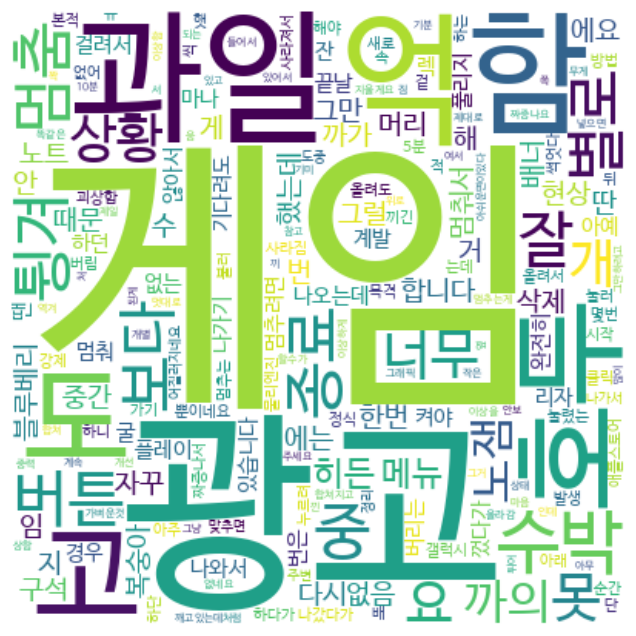

In [126]:
#워드아트로
import matplotlib.pyplot as plt

wc = WordCloud(random_state = 123, font_path = 'NanumBarunGothic', width = 400, height = 400, background_color = 'white')
wc.generate(" ".join(low_review_words))

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

부정리뷰 역시 광고로 인한 부정적인 반응이 많은 것 같고 튕기거나 멈추는 등의 문제점도 있는 것으로 보입니다.